In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [ ]:
# 패션 MNIST 데이터셋 불러오기 (훈련용, 테스트용 이미지와 라벨)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 각 숫자 라벨(0~9)을 사람이 읽을 수 있는 이름으로 매핑
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 픽셀 값을 0~255 범위에서 0~1 범위로 정규화 (학습 성능 향상)
train_images = train_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Sequential 모델 정의: 레이어를 순차적으로 쌓음
model = keras.Sequential([
    # 입력 이미지를 1차원으로 평탄화 (28x28 → 784)
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # 은닉층: 뉴런 128개, 활성화 함수는 ReLU (비선형성 추가)
    keras.layers.Dense(128, activation='relu'),
    
    # Dropout: 과적합 방지를 위해 90%의 뉴런을 학습에서 무작위로 제외
    keras.layers.Dropout(0.9),
    
    # 출력층: 클래스가 10개이므로 뉴런 10개, 확률 출력을 위해 softmax 사용
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일: 손실 함수와 최적화 방법, 평가 지표 설정
model.compile(
    optimizer='adam',  # 가중치 조정 방법 (Adam Optimizer)
    loss='sparse_categorical_crossentropy',  # 정수 라벨에 적합한 다중 클래스 손실 함수
    metrics=['accuracy']  # 정확도를 평가 지표로 사용
)

# 모델 훈련: 5 에폭 동안 학습 데이터를 이용해 학습 수행
history = model.fit(train_images, train_labels, epochs=5)


C:\Users\zero_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3600 - loss: 1.6814
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4940 - loss: 1.2434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5260 - loss: 1.1695
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5419 - loss: 1.1291
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5590 - loss: 1.0878


In [ ]:
# Sequential 모델 정의: 레이어를 순차적으로 쌓음
model = keras.Sequential([
    # 입력 이미지를 1차원 벡터로 변환 (28x28 → 784)
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # 은닉층: 뉴런 128개, ReLU 활성화 함수 사용
    keras.layers.Dense(128, activation='relu'),
    
    # 출력층: 클래스 수만큼 뉴런 (10개), 확률 출력을 위한 softmax
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일: 학습 방식 설정
model.compile(
    optimizer='adam',  # Adam 옵티마이저로 가중치 최적화
    loss='sparse_categorical_crossentropy',  # 정수 라벨용 다중 클래스 손실 함수
    metrics=['accuracy']  # 모델 평가 지표는 정확도
)

# 모델 훈련: 훈련 이미지와 라벨을 사용해 5번 반복 학습
history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7824 - loss: 0.6273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8610 - loss: 0.3855
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8738 - loss: 0.3434
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 0.3174
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8883 - loss: 0.3000


In [ ]:
# 훈련 데이터를 훈련용과 검증용으로 나눔 (1%를 검증용으로 사용)
X_train, X_valid, y_train, y_valid = train_test_split(
    train_images, train_labels, test_size=0.01, random_state=101
)

# 픽셀 값을 0~1 범위로 정규화 (모델 학습 안정화)
# 정규화의 이름: Min-Max Scaling
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense 층만 사용하는 간단한 분류 모델 정의
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 28x28 이미지를 1차원 벡터로 변환
    keras.layers.Dense(256, activation='relu'),  # 은닉층: 뉴런 256개, ReLU 활성화 함수
    keras.layers.Dense(10, activation='softmax') # 출력층: 클래스 10개, 확률 출력
])

# 모델 컴파일: 최적화 알고리즘, 손실 함수, 평가 지표 설정
model.compile(
    optimizer='adam',  # 학습률을 자동으로 조정하는 Adam 옵티마이저
    loss='sparse_categorical_crossentropy',  # 정수형 라벨용 손실 함수
    metrics=['accuracy']  # 평가 지표는 정확도
)

# 모델 학습
history = model.fit(
    X_train, y_train,                 # 훈련 데이터
    epochs=200,                       # 200번 반복 학습
    batch_size=512,                  # 한 번에 512개씩 처리
    validation_data=(X_valid, y_valid)  # 검증 데이터로 성능 확인
)

Epoch 1/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4602 - loss: 2.2026 - val_accuracy: 0.5967 - val_loss: 1.6513
Epoch 2/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 1.5237 - val_accuracy: 0.6717 - val_loss: 1.1885
Epoch 3/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 1.1370 - val_accuracy: 0.7383 - val_loss: 0.9663
Epoch 4/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.9399 - val_accuracy: 0.7483 - val_loss: 0.8293
Epoch 5/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 0.8214 - val_accuracy: 0.7683 - val_loss: 0.7431
Epoch 6/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7466 - loss: 0.7422 - val_accuracy: 0.7767 - val_loss: 0.6933
Epoch 7/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7539 - loss: 0.6965 - val_accuracy: 0.7817 - val_loss: 0.6542
Epoch 8/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7661 - loss: 0.6562 - val_accu

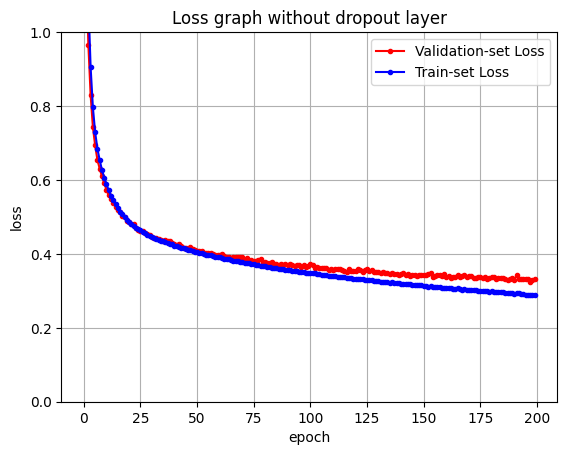

In [6]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

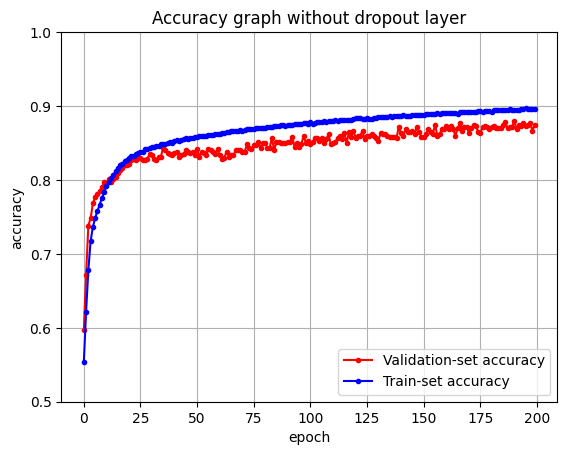

In [7]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

C:\Users\zero_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3668 - loss: 2.2154 - val_accuracy: 0.5583 - val_loss: 1.7204
Epoch 2/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5261 - loss: 1.6145 - val_accuracy: 0.6367 - val_loss: 1.2646
Epoch 3/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5904 - loss: 1.2550 - val_accuracy: 0.6917 - val_loss: 1.0525
Epoch 4/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6436 - loss: 1.0667 - val_accuracy: 0.7300 - val_loss: 0.9123
Epoch 5/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6775 - loss: 0.9419 - val_accuracy: 0.7550 - val_loss: 0.8166
Epoch 6/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7009 - loss: 0.8613 - val_accuracy: 0.7667 - val_loss: 0.7525
Epoch 7/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7182 - loss: 0.8019 - val_accuracy: 0.7667 - val_loss: 0.7106
Epoch 8/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 0.7639 - val_accu

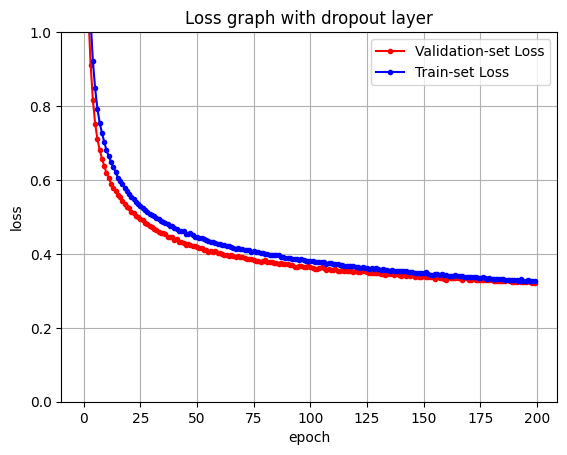

In [11]:
# Q. loss 값의 그래프를 그려봅시다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

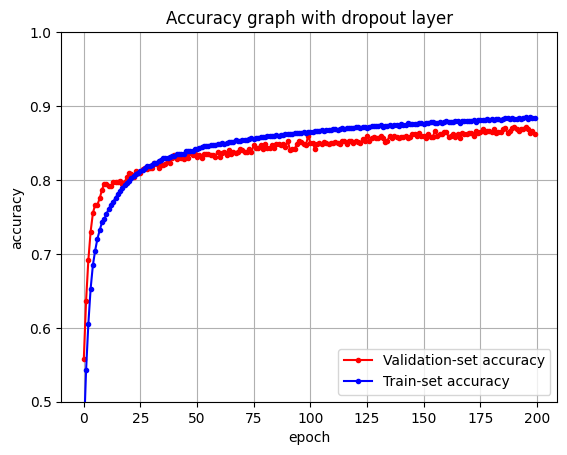

In [13]:
# Q. accuracy 값의 그래프를 그려봅시다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()